In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

import sys
sys.path.append('..')
from src.utils import input_unit
from src.imf import PowerLawIMF

/home/lucasmdesa/Documents/GitHub/environIMF/notebooks/../src/imf.py:660: SyntaxWarning: invalid escape sequence '\i'
  """Compute the galactic initial mass function.


In [2]:
imf = PowerLawIMF(1.e6, 0.08, 150)

norm1 264782.1737115633
norm2 264782.1737115633
norm1 264782.1737115633
norm2 264782.1737115633
norm1 1.0
norm2 1.0


In [3]:
imf.breaks

array([0.0e+00, 8.0e-02, 1.0e+00, 1.5e+02])

In [4]:
imf.exponents

array([-1.3, -1.3, -2.3, -2.3])

In [5]:
imf.norms

array([1.00000000e+00, 2.64782174e+05, 2.64782174e+05, 1.00000000e+00])

In [6]:
imf.integrate(1, 100, normalized=False)

0.7672985488988389

In [7]:
imf.integrate(1.1, 100, normalized=False)

0.6776564922658656

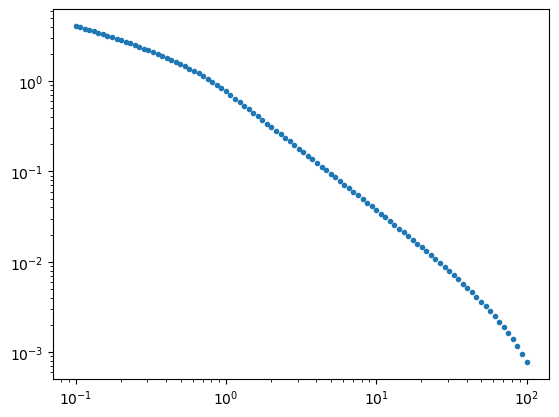

In [8]:
x0s = np.logspace(-1, 2, 100)
imfs = [imf.integrate(x0, 149, normalized=False) for x0 in x0s]

plt.plot(x0s, imfs, '.')
plt.xscale('log')
plt.yscale('log')

In [9]:
imf.exponents

array([-1.3, -1.3, -2.3, -2.3])

In [10]:
imf.norms

array([1.00000000e+00, 2.64782174e+05, 2.64782174e+05, 1.00000000e+00])

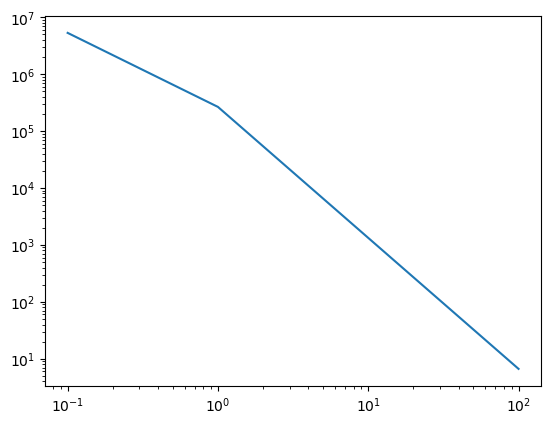

In [11]:
x0s = np.logspace(-1, 2, 100)
imfs = [imf.imf(x0) for x0 in x0s]

plt.plot(x0s, imfs)
plt.xscale('log')
plt.yscale('log')

In [12]:
imf.norms

array([1.00000000e+00, 2.64782174e+05, 2.64782174e+05, 1.00000000e+00])

In [13]:
1.**-1.3

1.0

In [14]:
imf.imf(0.99)

268264.3670701309

In [15]:
imf.imf(1.01)

258791.24711466793

In [16]:
imf.imf(1.0722)

225556.0063808393

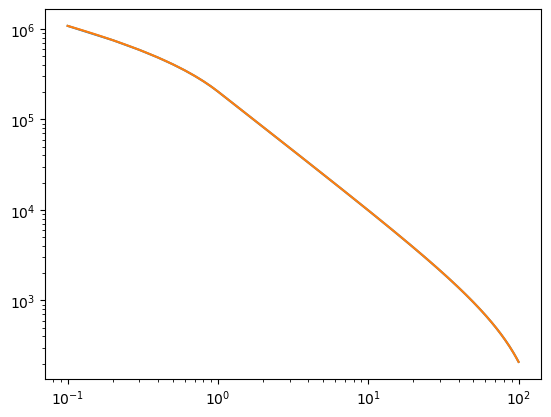

In [17]:
x0s = np.linspace(0.1, 100, 1000)
imf_ints = [imf.integrate(x0, 150, normalized=True) for x0 in x0s]

x0s2 = np.logspace(-1, 2, 100)
imf_ints2 = [imf.integrate(x0, 150, normalized=True) for x0 in x0s2]

plt.plot(x0s, imf_ints)

plt.plot(x0s2, imf_ints2)
plt.xscale('log')
plt.yscale('log')

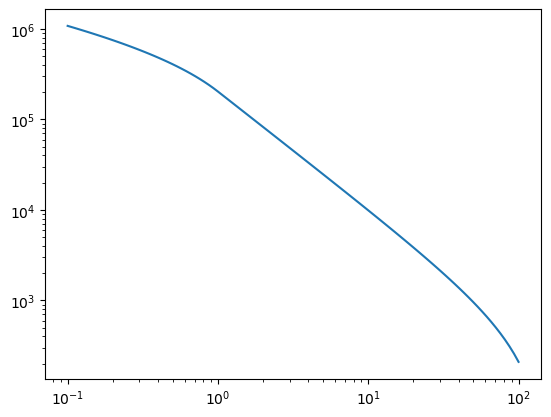

In [18]:
x0s = np.logspace(-1, 2, 100)
imf_ints = [imf.integrate(x0, 150, normalized=True) for x0 in x0s]

plt.plot(x0s, imf_ints)
plt.xscale('log')
plt.yscale('log')

In [20]:
imf.m_tot

1000000.0

In [21]:
imf.integrate(0.08, 150, mass=True)

1000000.0

In [22]:
imf.integrate(0.08, 150, mass=False)

1203726.7256386587

In [19]:
@input_unit((u.m, u.erg))
def f(x, y, model='a'):
    print(x, y, model)
    if model == 'a':
        return x * y
    else:
        return x /y

In [20]:
f

<function __main__.f(x, y, model='a')>

In [21]:
f(1, 'a', 4*u.s)

1.0 m a erg 4.0 s


<Quantity 1. m / (a erg)>

In [22]:
a = (1,2,3,4,5)
b = (6,7)

In [23]:
c = (*b, *a[len(b):])

In [24]:
c

(6, 7, 3, 4, 5)

In [25]:
b = [0, 1, 2, 3, 0]

In [26]:
a = np.array([0.08, 0.5, 1, 150])

In [27]:
b[np.searchsorted(a, 0.01, side='right')]

0

In [28]:
np.pad(a, 1, mode='constant', constant_values=0)

array([0.0e+00, 8.0e-02, 5.0e-01, 1.0e+00, 1.5e+02, 0.0e+00])